Edited May 28th: Ready to use 

In [85]:
library(repr)
library(feather)
library(tidyverse)
library(lubridate)
library(latex2exp) 
library(ggpubr)

options(scipen=99)
Sys.setenv(TZ='GMT')
options(warn=-1)

options(repr.plot.width=13, repr.plot.height=10)

In [86]:
processed_data_path = '~/Box Sync/Zhang_Lab/code/sgp_analysis/data_processing/processed_data'

ts_data = read_feather(paste0(processed_data_path, '/acsm_time_series.feather'))

# ADJUST TO UTC -6 
ts_data$local_time = ts_data$acsm_utc_time - 3600*6

In [87]:
new_ts  = ts_data  %>% 
                # create two new variables
                mutate(year = as.factor(year(local_time)),
                       month = as.factor(month(local_time, label=TRUE)),
                       day = day(local_time),
                       hour = hour(local_time)) %>% 
                mutate(total=Org+NH4+SO4+NO3+Chl) 
                
gathered_data = new_ts  %>%  
            select(-acsm_utc_time, -total)   %>% 
            gather(`Org`, `NH4`, `SO4`, `NO3`, `Chl`, 
                     key = "species", value = "val")  %>% 
            mutate(species = factor(species, levels=c('Org', 'NH4', 'SO4', 'NO3', 'Chl')))

totals = new_ts  %>% 
                group_by(month, year) %>% 
                summarise(Total = mean(total, na.rm=T))
                
by_species = gathered_data  %>% 
                group_by(month, year, species) %>% 
                summarise(Mean = mean(val, na.rm=T))    

In [88]:
pct_data = by_species  %>% left_join(totals)  %>% 
                mutate(Pct = Mean/Total)  %>% 
                select(-Total)


Joining, by = c("month", "year")


In [89]:
head(pct_data)

month,year,species,Mean,Pct
<ord>,<fct>,<fct>,<dbl>,<dbl>
Jan,2011,Org,0.985879382,0.270661516
Jan,2011,NH4,0.524903529,0.144106051
Jan,2011,SO4,0.450371057,0.123644043
Jan,2011,NO3,1.672773125,0.459240063
Jan,2011,Chl,0.008553735,0.002348327
Jan,2012,Org,1.476559805,0.468735789


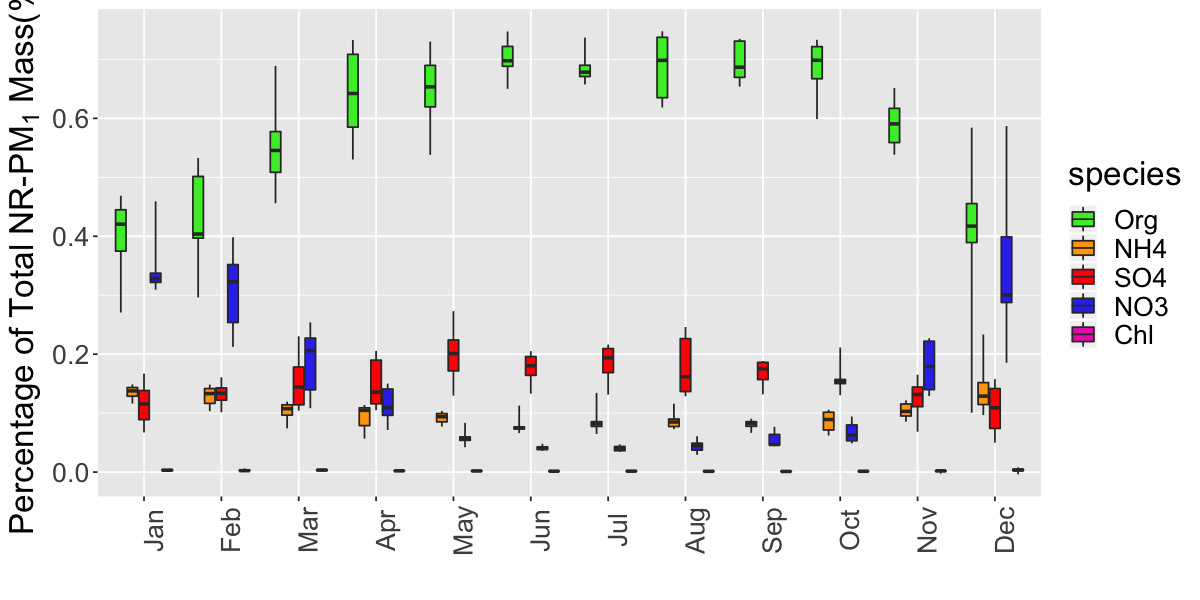

In [106]:
options(repr.plot.width=10, repr.plot.height=5)
fig1 = pct_data  %>%  ggplot(aes(x=month, y=Pct, fill=species)) + 
xlab("") + ylab(TeX('Percentage of Total $NR-PM_1$ Mass$ (%)'))+ geom_boxplot(coef=30)+ 
    scale_fill_manual(values= c('#43eb34', 'orange', 'red', '#343deb', '#eb34b7')) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90))

fig1

In [107]:
fig1  %>% ggsave(filename="saved_plots/Boxplot Pct Ave. Monthly Concen.png" , width=20, height=8, dpi=300)

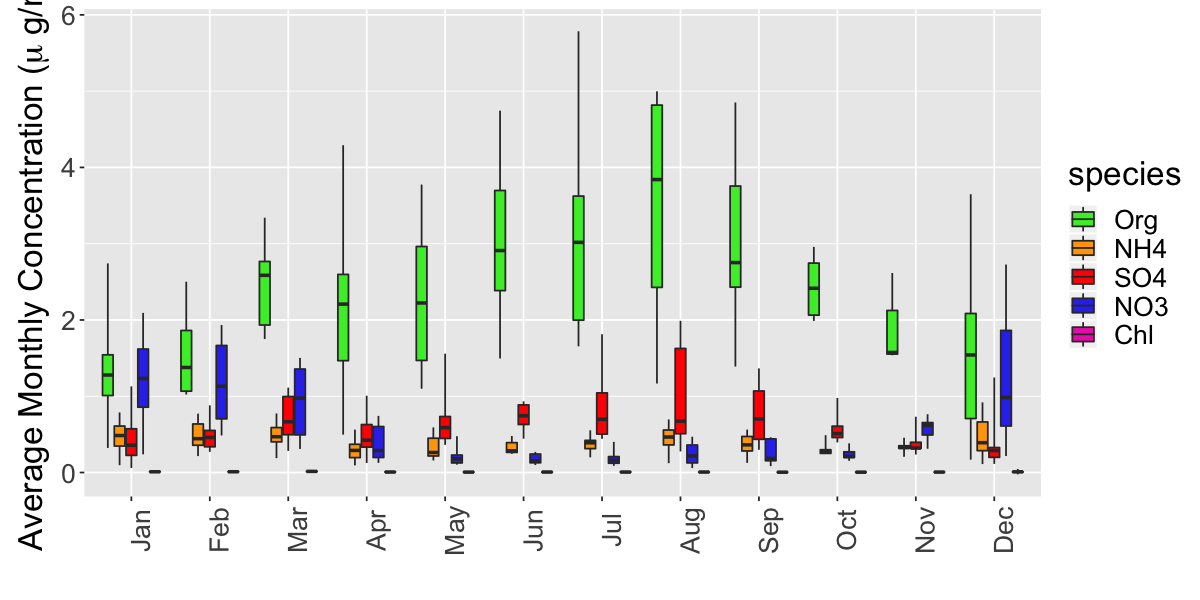

In [104]:
options(repr.plot.width=10, repr.plot.height=5)
fig2 = pct_data  %>%  ggplot(aes(x=month, y=Mean, fill=species)) + 
geom_boxplot(coef=100) + ylab(TeX('Average Monthly Concentration ($\\mu$ g/m^3)')) + xlab("")+ 
    scale_fill_manual(values= c('#43eb34', 'orange', 'red', '#343deb', '#eb34b7')) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90))

fig2

In [105]:
fig2  %>% ggsave(filename="saved_plots/Boxplot Ave. Monthly Concen.png" , width=20, height=8, dpi=300)